In [38]:
# Importar o llamar cada una de las librerias o paquetes necesarios.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
# importando train_test_split desde sklearn
from sklearn.model_selection import train_test_split
# Módulo de importación
from sklearn.linear_model import LinearRegression
# Importar módulo r2_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Ajuste de la regresión de bosque aleatorio al conjunto de datos
# Importa el regresor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [4]:
from google.colab import files # Permite subir la base de datos para la posterior lectura y tratamiento de la misma.
uploaded= files.upload ()

Saving BOVINOSUCRE.xlsx to BOVINOSUCRE.xlsx


In [5]:
data=pd.read_excel("BOVINOSUCRE.xlsx") # Data obtenida en https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Estado-Ganado-Bovino-en-Sucre/vgur-fw6e 

In [6]:
data # Visualización de la data.

,AÑO,MUNICIPIO,MACHOS MENORES DE 12 MESES,HEMBRAS MENORES DE 12 MESES,MACHOS DE 12 A 24 MESES,HEMBRAS DE 12 A 24 MESES,MACHOS DE 24 A 36 MESES,HEMBRAS DE 24 A 36 MESES,MACHOS MAYORES DE 36 MESES,HEMBRAS MAYORES DE 36 MESES,TOTAL MACHOS,TOTAL HEMBRAS,TOTAL
0,2016,BUENAVISTA,2805,2817,4178,2863,733,3551,706,8478,8422,17709,26131
1,2016,CAIMITO,3117,3087,3380,3576,2399,3415,482,10019,9378,20097,29475
2,2016,CHALÁN,322,317,165,239,31,307,57,778,575,1641,2216
3,2016,COLOSÓ,428,405,552,406,85,659,89,1220,1154,2690,3844
4,2016,COROZAL,4116,4069,4897,2389,357,3559,666,12226,10036,22243,32279
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2018,SINCÉ,11073,12910,10828,8889,1688,12003,2161,33518,25750,67320,93070
74,2018,SINCELEJO,3630,3755,9226,3150,2713,3616,4689,12230,20258,22751,43009
75,2018,SUCRE,9314,10885,10288,10284,917,14299,1720,37538,22239,73006,95245
76,2018,TOLÚ,3444,3547,5191,3747,11304,3808,1283,10740,21222,21842,43064


In [7]:
data1=data.drop(columns=["MUNICIPIO"]) # Eliminamos la columna no categorica.

In [8]:
data1  # Visualización de la data,leugo de la eliminacion de la columna categorica.

,AÑO,MACHOS MENORES DE 12 MESES,HEMBRAS MENORES DE 12 MESES,MACHOS DE 12 A 24 MESES,HEMBRAS DE 12 A 24 MESES,MACHOS DE 24 A 36 MESES,HEMBRAS DE 24 A 36 MESES,MACHOS MAYORES DE 36 MESES,HEMBRAS MAYORES DE 36 MESES,TOTAL MACHOS,TOTAL HEMBRAS,TOTAL
0,2016,2805,2817,4178,2863,733,3551,706,8478,8422,17709,26131
1,2016,3117,3087,3380,3576,2399,3415,482,10019,9378,20097,29475
2,2016,322,317,165,239,31,307,57,778,575,1641,2216
3,2016,428,405,552,406,85,659,89,1220,1154,2690,3844
4,2016,4116,4069,4897,2389,357,3559,666,12226,10036,22243,32279
...,...,...,...,...,...,...,...,...,...,...,...,...
73,2018,11073,12910,10828,8889,1688,12003,2161,33518,25750,67320,93070
74,2018,3630,3755,9226,3150,2713,3616,4689,12230,20258,22751,43009
75,2018,9314,10885,10288,10284,917,14299,1720,37538,22239,73006,95245
76,2018,3444,3547,5191,3747,11304,3808,1283,10740,21222,21842,43064


In [9]:
data1.describe().T # Estadística descriptiva de los datos, analisis exploratorio. 

,count,mean,std,min,25%,50%,75%,max
AÑO,78.0,2017.000000,0.821781,2016.0,2016.00,2017.0,2018.00,2018.0
MACHOS MENORES DE 12 MESES,78.0,4072.820513,2948.315062,322.0,2211.75,3106.5,6153.25,11847.0
HEMBRAS MENORES DE 12 MESES,78.0,4504.282051,3349.747321,317.0,2272.50,3555.0,7147.00,12910.0
MACHOS DE 12 A 24 MESES,78.0,5040.858974,3608.016539,165.0,2320.50,4208.5,7691.75,14313.0
HEMBRAS DE 12 A 24 MESES,78.0,4121.064103,2977.077685,191.0,2283.25,3325.5,4949.75,12173.0
MACHOS DE 24 A 36 MESES,78.0,2780.641026,3687.264614,15.0,392.50,904.0,3604.00,14556.0
HEMBRAS DE 24 A 36 MESES,78.0,4885.179487,4166.807438,171.0,2489.25,3555.0,6316.75,22747.0
MACHOS MAYORES DE 36 MESES,78.0,1107.807692,1086.271068,57.0,521.75,689.0,1556.00,6126.0
HEMBRAS MAYORES DE 36 MESES,78.0,13684.256410,10042.983132,778.0,7907.75,10332.0,17670.50,38507.0
TOTAL MACHOS,78.0,13002.128205,9278.255321,575.0,6228.00,10065.5,20306.50,36796.0


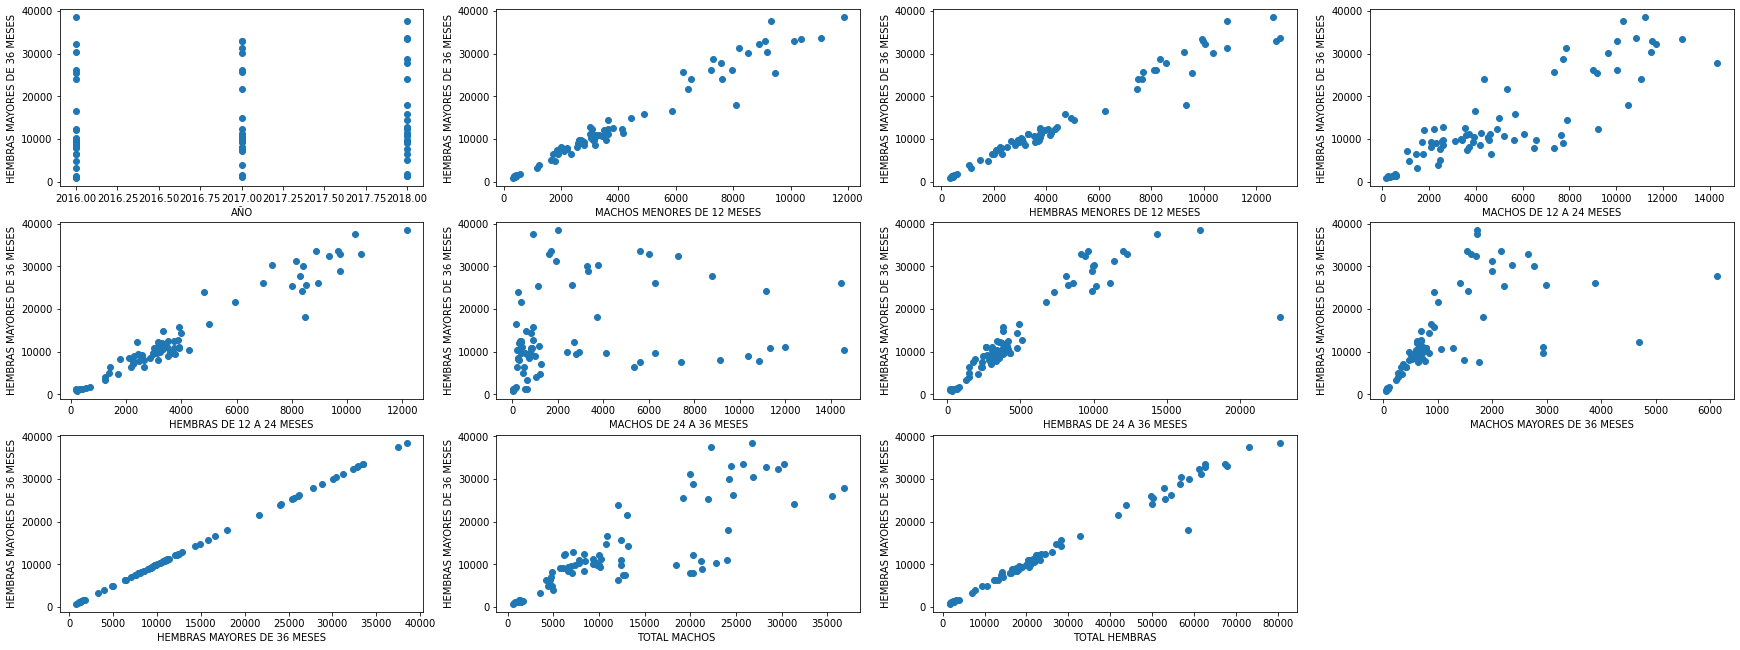

In [10]:
plt.figure(figsize=(30,15)) # Grafico de correlación bivariada
for i,j in enumerate(data1.columns[:-1]):
    plt.subplot(4,4,i+1)
    plt.scatter(data1[j],data1["HEMBRAS MAYORES DE 36 MESES"])
    plt.xlabel(j)
    plt.ylabel("HEMBRAS MAYORES DE 36 MESES")
plt.show()

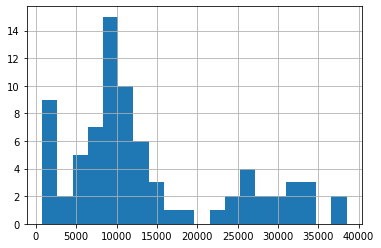

In [12]:
data1["HEMBRAS MAYORES DE 36 MESES"].hist(bins=20)
plt.show()

In [15]:
X.columns # Observo los nombres de mis columnas ademas de su escritura.

Index(['const', 'AÑO', 'MACHOS MENORES DE 12 MESES', 'MACHOS DE 12 A 24 MESES',
       'MACHOS DE 24 A 36 MESES'],
      dtype='object')

In [14]:
Y = data1["HEMBRAS MAYORES DE 36 MESES"]
X = data1.drop(columns=["HEMBRAS MAYORES DE 36 MESES","TOTAL MACHOS ","TOTAL HEMBRAS","HEMBRAS MENORES DE 12 MESES","HEMBRAS DE 12 A 24 MESES","HEMBRAS DE 24 A 36 MESES","MACHOS MAYORES DE 36 MESES","TOTAL"]) # Elimino varias columnas para poder mejorar la prediccion.
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
X 

,const,AÑO,MACHOS MENORES DE 12 MESES,MACHOS DE 12 A 24 MESES,MACHOS DE 24 A 36 MESES
0,1.0,2016,2805,4178,733
1,1.0,2016,3117,3380,2399
2,1.0,2016,322,165,31
3,1.0,2016,428,552,85
4,1.0,2016,4116,4897,357
...,...,...,...,...,...
73,1.0,2018,11073,10828,1688
74,1.0,2018,3630,9226,2713
75,1.0,2018,9314,10288,917
76,1.0,2018,3444,5191,11304


In [17]:
X.corr()

,const,AÑO,MACHOS MENORES DE 12 MESES,MACHOS DE 12 A 24 MESES,MACHOS DE 24 A 36 MESES
const,NaN,NaN,NaN,NaN,NaN
AÑO,NaN,1.000000,0.040175,0.068803,-0.034853
MACHOS MENORES DE 12 MESES,NaN,0.040175,1.000000,0.866551,0.214936
MACHOS DE 12 A 24 MESES,NaN,0.068803,0.866551,1.000000,0.487443
MACHOS DE 24 A 36 MESES,NaN,-0.034853,0.214936,0.487443,1.000000


In [18]:
model_linear = sm.OLS(Y, X).fit() # Calcula regresión
predictions_SM = model_linear.predict(X) 

In [19]:
model_linear.summary()  # Información de todo el modelo 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     HEMBRAS MAYORES DE 36 MESES   R-squared:                       0.960
Model:                                     OLS   Adj. R-squared:                  0.958
Method:                          Least Squares   F-statistic:                     434.7
Date:                         Sat, 11 Jun 2022   Prob (F-statistic):           4.44e-50
Time:                                 21:12:02   Log-Likelihood:                -703.66
No. Observations:                           78   AIC:                             1417.
Df Residuals:                               73   BIC:                             1429.
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -6.72e+05   5.84e+05     -1.150      0.254   -1.84e+06    4.93e+05
AÑO                          333.1747    289.791      1.150      0.254    -244.377     910.727
MACHOS MENORES DE 12 MESES     3.2172      0.183     17.578      0.000       2.852       3.582
MACHOS DE 12 A 24 MESES        0.0935      0.168      0.557      0.579      -0.241       0.428
MACHOS DE 24 A 36 MESES        0.0516      0.084      0.615      0.540      -0.116       0.219
==============================================================================
Omnibus:                       29.093   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.740
Skew:                          -0.871   Prob(JB):                     5.03e-33
Kurtosis:                       9.537   Cond. No.                     2.18e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

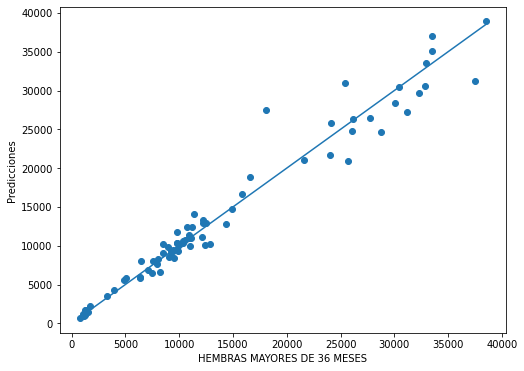

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(data1["HEMBRAS MAYORES DE 36 MESES"],predictions_SM)
u=np.linspace(data1["HEMBRAS MAYORES DE 36 MESES"].min(),data1["HEMBRAS MAYORES DE 36 MESES"].max(),5)
plt.plot(u,u)
plt.xlabel("HEMBRAS MAYORES DE 36 MESES")
plt.ylabel("Predicciones")
plt.show()

In [21]:
rmse=np.sqrt(np.mean((data1["HEMBRAS MAYORES DE 36 MESES"]-predictions_SM)**2))
print("RMSE del modelo es",rmse)

RMSE del modelo es 2002.951486402465


In [22]:
features=data1.drop(columns=["HEMBRAS MAYORES DE 36 MESES"])
target=data1["HEMBRAS MAYORES DE 36 MESES"]
# Dividir los datos
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 2013)

In [23]:
# Creando un objeto de la clase LinearRegression
LR = LinearRegression() # Regresion lineal con constante
# Ajustando los datos de entrenamiento
LR.fit(x_train,y_train)
prediction_LR =  LR.predict(x_test)
prediction_LR

array([26110.,  7888.,  6370., 18033.,  7570.,  8061.,  7077., 15815.,
       24001., 10740., 11088., 31222., 25389., 30399., 12522.,  1223.])

Feature: 0, Score: -0.00000
Feature: 1, Score: -0.07143
Feature: 2, Score: -1.00000
Feature: 3, Score: -0.07143
Feature: 4, Score: -1.00000
Feature: 5, Score: -0.07143
Feature: 6, Score: -1.00000
Feature: 7, Score: -0.07143
Feature: 8, Score: -0.28571
Feature: 9, Score: 0.64286
Feature: 10, Score: 0.35714


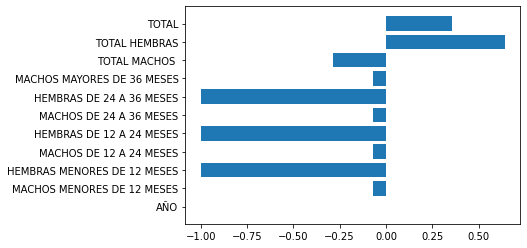

In [24]:
# Obtener importancia
var=LR.feature_names_in_
importance = LR.coef_
# Resumir la importancia de la característica
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# Importancia de la característica de la trama
plt.barh(var, importance)
plt.show()

In [25]:
important=pd.DataFrame({"variable":var,"importance":importance})

In [26]:
important.sort_values(by="importance")

,variable,importance
4,HEMBRAS DE 12 A 24 MESES,-1.000000e+00
6,HEMBRAS DE 24 A 36 MESES,-1.000000e+00
2,HEMBRAS MENORES DE 12 MESES,-1.000000e+00
8,TOTAL MACHOS,-2.857143e-01
1,MACHOS MENORES DE 12 MESES,-7.142857e-02
7,MACHOS MAYORES DE 36 MESES,-7.142857e-02
3,MACHOS DE 12 A 24 MESES,-7.142857e-02
5,MACHOS DE 24 A 36 MESES,-7.142857e-02
0,AÑO,-3.040729e-13
10,TOTAL,3.571429e-01


In [27]:
predictions_LR=LR.predict(features)

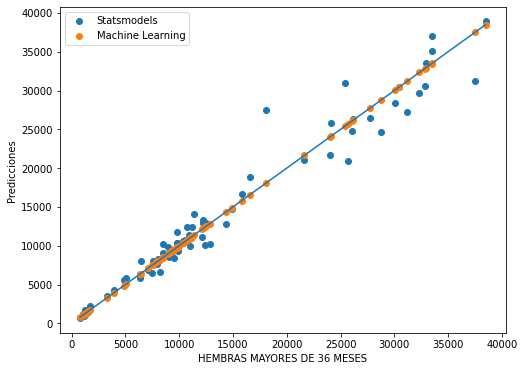

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(data1["HEMBRAS MAYORES DE 36 MESES"],predictions_SM, label="Statsmodels")
plt.scatter(data1["HEMBRAS MAYORES DE 36 MESES"],predictions_LR, label="Machine Learning")
u=np.linspace(data1["HEMBRAS MAYORES DE 36 MESES"].min(),data1["HEMBRAS MAYORES DE 36 MESES"].max(),5)
plt.plot(u,u)
plt.xlabel("HEMBRAS MAYORES DE 36 MESES")
plt.ylabel("Predicciones")
plt.legend()
plt.show()

In [29]:
LR2 = LinearRegression(fit_intercept=False)
# Ajustando los datos de entrenamiento
LR2.fit(x_train,y_train)
predictions_LR2=LR2.predict(features)

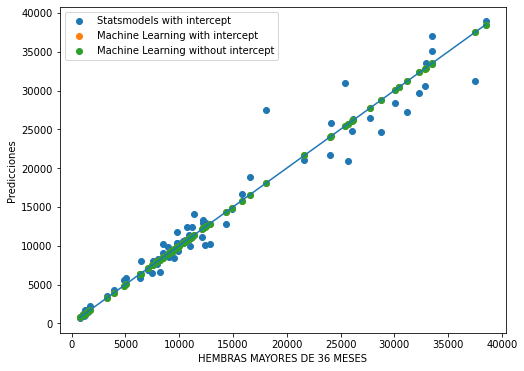

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(data1["HEMBRAS MAYORES DE 36 MESES"],predictions_SM, label="Statsmodels with intercept")
plt.scatter(data1["HEMBRAS MAYORES DE 36 MESES"],predictions_LR, label="Machine Learning with intercept")
plt.scatter(data1["HEMBRAS MAYORES DE 36 MESES"],predictions_LR2, label="Machine Learning without intercept")
u=np.linspace(data1["HEMBRAS MAYORES DE 36 MESES"].min(),data1["HEMBRAS MAYORES DE 36 MESES"].max(),5)
plt.plot(u,u)
plt.xlabel("HEMBRAS MAYORES DE 36 MESES")
plt.ylabel("Predicciones")
plt.legend()
plt.show()

In [31]:
LR2 = LinearRegression(fit_intercept=False) # Regresion lineal sin constante
# Ajustando los datos de entrenamiento
LR2.fit(x_train,y_train)
predictions_LR2=LR2.predict(features)

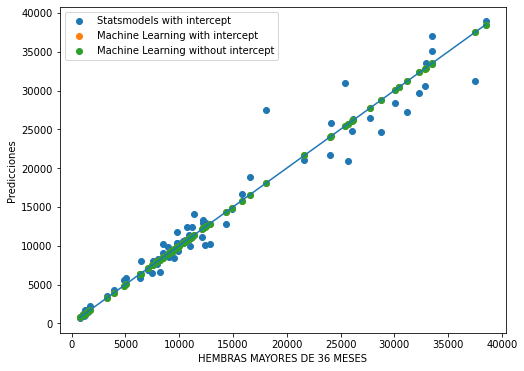

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(data1["HEMBRAS MAYORES DE 36 MESES"],predictions_SM, label="Statsmodels with intercept")
plt.scatter(data1["HEMBRAS MAYORES DE 36 MESES"],predictions_LR, label="Machine Learning with intercept")
plt.scatter(data1["HEMBRAS MAYORES DE 36 MESES"],predictions_LR2, label="Machine Learning without intercept")
u=np.linspace(data1["HEMBRAS MAYORES DE 36 MESES"].min(),data1["HEMBRAS MAYORES DE 36 MESES"].max(),5)
plt.plot(u,u)
plt.xlabel("HEMBRAS MAYORES DE 36 MESES")
plt.ylabel("Predicciones")
plt.legend()
plt.show()

In [33]:
# predicting the accuracy score
score_SM=r2_score(target,predictions_SM)
score_LR=r2_score(target,predictions_LR)
score_LR2=r2_score(target,predictions_LR2)
RMS2_SM=np.sqrt(mean_squared_error(target,predictions_SM))
RMS2_LR=np.sqrt(mean_squared_error(target,predictions_LR))
RMS2_LR2=np.sqrt(mean_squared_error(target,predictions_LR2))

for i,j in zip([score_SM,score_LR,score_LR2],["score_SM","score_LR","score_LR2"]):
    print(j," is ",i)
for i,j in zip([RMS2_SM,RMS2_LR,RMS2_LR2],["RMS2_SM","RMS2_LR","RMS2_LR2"]):
    print(j," is ",i)

score_SM  is  0.9597079585844962
score_LR  is  1.0
score_LR2  is  1.0
RMS2_SM  is  2002.951486402465
RMS2_LR  is  4.461874437361206e-11
RMS2_LR2  is  3.093798081897363e-11


In [34]:
# Crear objeto regresor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# Ajustar el regresor con datos x e y
regressor.fit(features, target) 
predictions_RF=regressor.predict(features)

In [35]:
score_RF=r2_score(target,predictions_RF)
RMS2_RF=np.sqrt(mean_squared_error(target,predictions_RF))

In [36]:
for i,j in zip([score_SM,score_LR,score_LR2,score_RF],["score_SM","score_LR","score_LR2","score_RF"]):
    print(j," is ",i)
for i,j in zip([RMS2_SM,RMS2_LR,RMS2_LR2,RMS2_RF],["RMS2_SM","RMS2_LR","RMS2_LR2","RMS2_RF"]):
    print(j," is ",i)

score_SM  is  0.9597079585844962
score_LR  is  1.0
score_LR2  is  1.0
score_RF  is  0.9944695047505905
RMS2_SM  is  2002.951486402465
RMS2_LR  is  4.461874437361206e-11
RMS2_LR2  is  3.093798081897363e-11
RMS2_RF  is  742.0664661018045


Se evidencia que el modelo que mejor se ajusta a la data es el LR2 con un SCORE o r ajustado de 1.0 y un error de predicción o RMS2 de 3.093798081897363e-11, por lo tanto nos quedamos con Machine Learning con regresión lineal múltiple.

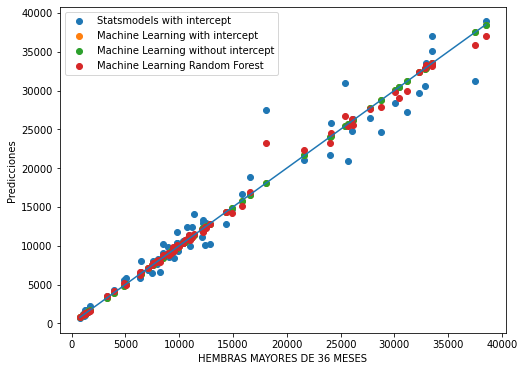

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(data1["HEMBRAS MAYORES DE 36 MESES"],predictions_SM, label="Statsmodels with intercept")
plt.scatter(data1["HEMBRAS MAYORES DE 36 MESES"],predictions_LR, label="Machine Learning with intercept")
plt.scatter(data1["HEMBRAS MAYORES DE 36 MESES"],predictions_LR2, label="Machine Learning without intercept")
plt.scatter(data1["HEMBRAS MAYORES DE 36 MESES"],predictions_RF, label="Machine Learning Random Forest")
u=np.linspace(data1["HEMBRAS MAYORES DE 36 MESES"].min(),data1["HEMBRAS MAYORES DE 36 MESES"].max(),5)
plt.plot(u,u)
plt.xlabel("HEMBRAS MAYORES DE 36 MESES")
plt.ylabel("Predicciones")
plt.legend()
plt.show()